In [1]:
import pandas as pd
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

file_path = 'BPI_Challenge_2012.xes'

# Carregar log e exibir algumas linhas

In [2]:
log = xes_importer.apply(file_path)

In [3]:
print(log[0]) #prints the first trace of the log
print(len(log[0]))
print(log[0][0]) #prints the first event of the first trace

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173688', 'AMOUNT_REQ': '20000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10629', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 13, 10, 37, 37, 26000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
26
{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}


In [4]:
print(log[1]) #prints the first trace of the log
print(len(log[1]))

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173691', 'AMOUNT_REQ': '5000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10809', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 10, 14, 17, 34, 633000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
39


In [10]:
print([ev['concept:name'] for ev in log[0]])

['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED', 'W_Completeren aanvraag', 'W_Completeren aanvraag', 'A_ACCEPTED', 'O_SELECTED', 'A_FINALIZED', 'O_CREATED', 'O_SENT', 'W_Nabellen offertes', 'W_Completeren aanvraag', 'W_Nabellen offertes', 'W_Nabellen offertes', 'W_Nabellen offertes', 'W_Nabellen offertes', 'W_Nabellen offertes', 'O_SENT_BACK', 'W_Valideren aanvraag', 'W_Nabellen offertes', 'W_Valideren aanvraag', 'A_REGISTERED', 'A_APPROVED', 'O_ACCEPTED', 'A_ACTIVATED', 'W_Valideren aanvraag']


# Montar Bag of Words do log

In [20]:
from collections import Counter

bow = []
for trace in log:
    bow_line = Counter()
    for event in trace:
        bow_line[event['concept:name']] += 1.
    bow.append(bow_line)
        

In [21]:
df_bow = pd.DataFrame(bow).fillna(0.)

In [23]:
df_bow

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,O_ACCEPTED,A_ACTIVATED,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude
0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,9.0,1.0,3.0,1.0,3.0,3.0,25.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13084,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
13085,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


## Conforme acima, o log contém 24 atividades de 13.087 casos.

In [26]:
# Exibe atividades mais repetidas
df_bow.max()

A_SUBMITTED                         1.0
A_PARTLYSUBMITTED                   1.0
A_PREACCEPTED                       1.0
W_Completeren aanvraag             68.0
A_ACCEPTED                          1.0
O_SELECTED                          7.0
A_FINALIZED                         1.0
O_CREATED                           7.0
O_SENT                              7.0
W_Nabellen offertes                69.0
O_SENT_BACK                         3.0
W_Valideren aanvraag               59.0
A_REGISTERED                        1.0
A_APPROVED                          1.0
O_ACCEPTED                          1.0
A_ACTIVATED                         1.0
O_CANCELLED                         6.0
W_Wijzigen contractgegevens         3.0
A_DECLINED                          1.0
A_CANCELLED                         1.0
W_Afhandelen leads                 32.0
O_DECLINED                          1.0
W_Nabellen incomplete dossiers    122.0
W_Beoordelen fraude                20.0
dtype: float64

In [27]:
df_bow.mean()

A_SUBMITTED                       1.000000
A_PARTLYSUBMITTED                 1.000000
A_PREACCEPTED                     0.562925
W_Completeren aanvraag            4.191182
A_ACCEPTED                        0.390693
O_SELECTED                        0.537174
A_FINALIZED                       0.383205
O_CREATED                         0.537174
O_SENT                            0.537174
W_Nabellen offertes               3.974631
O_SENT_BACK                       0.263926
W_Valideren aanvraag              1.590051
A_REGISTERED                      0.171621
A_APPROVED                        0.171621
O_ACCEPTED                        0.171391
A_ACTIVATED                       0.171621
O_CANCELLED                       0.279285
W_Wijzigen contractgegevens       0.000917
A_DECLINED                        0.583403
A_CANCELLED                       0.214488
W_Afhandelen leads                1.265836
O_DECLINED                        0.061282
W_Nabellen incomplete dossiers    1.924811
W_Beoordele

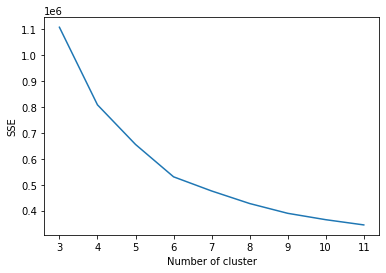

In [34]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_bow.values

sse = {}
for k in range(3, 12):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=6).fit(X)

In [37]:
df_bow['cluster'] = kmeans.labels_

In [50]:
dfs = {}
for k in range(6):
    dfs[k] = df_bow[df_bow.cluster == k]

In [56]:
print(len(dfs[0]))
dfs[1].mean()

2897


A_SUBMITTED                       1.000000
A_PARTLYSUBMITTED                 1.000000
A_PREACCEPTED                     0.233038
W_Completeren aanvraag            1.233038
A_ACCEPTED                        0.028694
O_SELECTED                        0.018370
A_FINALIZED                       0.018370
O_CREATED                         0.018370
O_SENT                            0.018370
W_Nabellen offertes               0.054572
O_SENT_BACK                       0.000939
W_Valideren aanvraag              0.002816
A_REGISTERED                      0.000268
A_APPROVED                        0.000268
O_ACCEPTED                        0.000268
A_ACTIVATED                       0.000268
O_CANCELLED                       0.015017
W_Wijzigen contractgegevens       0.000000
A_DECLINED                        0.897426
A_CANCELLED                       0.099088
W_Afhandelen leads                1.439662
O_DECLINED                        0.001475
W_Nabellen incomplete dossiers    0.000000
W_Beoordele

In [55]:
print(len(dfs[1]))
dfs[1].mean()

7458


A_SUBMITTED                       1.000000
A_PARTLYSUBMITTED                 1.000000
A_PREACCEPTED                     0.233038
W_Completeren aanvraag            1.233038
A_ACCEPTED                        0.028694
O_SELECTED                        0.018370
A_FINALIZED                       0.018370
O_CREATED                         0.018370
O_SENT                            0.018370
W_Nabellen offertes               0.054572
O_SENT_BACK                       0.000939
W_Valideren aanvraag              0.002816
A_REGISTERED                      0.000268
A_APPROVED                        0.000268
O_ACCEPTED                        0.000268
A_ACTIVATED                       0.000268
O_CANCELLED                       0.015017
W_Wijzigen contractgegevens       0.000000
A_DECLINED                        0.897426
A_CANCELLED                       0.099088
W_Afhandelen leads                1.439662
O_DECLINED                        0.001475
W_Nabellen incomplete dossiers    0.000000
W_Beoordele

In [74]:
df_clusters = pd.DataFrame([df.mean() for df in dfs.values()])


In [75]:
df_clusters

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,A_ACTIVATED,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,cluster
0,1.0,1.0,1.000000,4.972730,1.000000,1.220918,1.000000,1.220918,1.220918,7.505696,...,0.464273,0.503970,0.001381,0.187090,0.283051,0.875388,0.187090,1.127718,0.016569,0.0
1,1.0,1.0,0.233038,1.233038,0.028694,0.018370,0.018370,0.018370,0.018370,0.054572,...,0.000268,0.015017,0.000000,0.897426,0.099088,1.439662,0.001475,0.000000,0.065701,1.0
2,1.0,1.0,1.000000,6.981818,1.000000,1.890909,1.000000,1.890909,1.890909,10.218182,...,0.572727,1.118182,0.000000,0.118182,0.227273,1.045455,0.118182,57.509091,0.154545,2.0
3,1.0,1.0,1.000000,22.397550,0.187082,0.193764,0.163697,0.193764,0.193764,1.397550,...,0.042316,0.083519,0.000000,0.207127,0.654788,1.518931,0.038976,0.260579,0.031180,3.0
4,1.0,1.0,1.000000,6.587031,1.000000,1.813424,1.000000,1.813424,1.813424,22.913538,...,0.188851,1.452787,0.001138,0.098976,0.639363,1.063709,0.098976,0.832765,0.018203,4.0
5,1.0,1.0,1.000000,5.416568,1.000000,1.633136,1.000000,1.633136,1.633136,8.692308,...,0.747929,0.719527,0.008284,0.134911,0.086391,1.040237,0.134911,17.314793,0.076923,5.0


### A primeira tentativa de clusterização encontrou muitos clusters, analisando rapidamente os dados não emerge um padrão

Vamos transformar o BoW em uma matriz de ocorre/não ocorre a atividade e analisar tanto as variações, excluindo loops, e a correlação, isto é, atividades que ocorrem sempre juntas.

In [85]:
df_one = df_bow.apply(lambda x: x  > 0.)

In [86]:
df_one

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,A_ACTIVATED,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,cluster
0,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,False,False,True
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
13083,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
13084,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
13085,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,False,False,True


In [96]:
df_one.drop_duplicates()

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,A_ACTIVATED,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,cluster
0,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,False,False,True
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
5,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,True,True,True
12226,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,False,False,False
12287,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,False,True,False,False,False,False
12398,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,False,False,True


In [97]:
df_bow.drop_duplicates()

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,A_ACTIVATED,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,cluster
0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,1.0,1.0,9.0,1.0,3.0,1.0,3.0,3.0,25.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
5,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0
13050,1.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0
13056,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,5
13078,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Eliminando loops e ordem, a quantidade de variações cai de 4.366 para 120.

## Eliminando apenas os loops, a quantidade de variações cai de 3.159 para 120.

Explicação: 

Foram analisadas nos notebooks anteriores as variações dos traces utilizando o PM4PY, chegando a um total de 4.366 variantes para 13.087 casos. O Bag of Words elimina a ordem das atividades, e analisando-se este obtém-se 3.159 variações. Excluindo também a contagem de atividades, baixamos para apenas 120 variações ocorrendo na matriz.

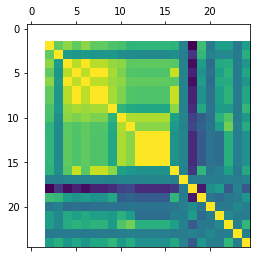

In [100]:
import matplotlib.pyplot as plt

plt.matshow(df_bow.corr())
plt.show()

<AxesSubplot:>

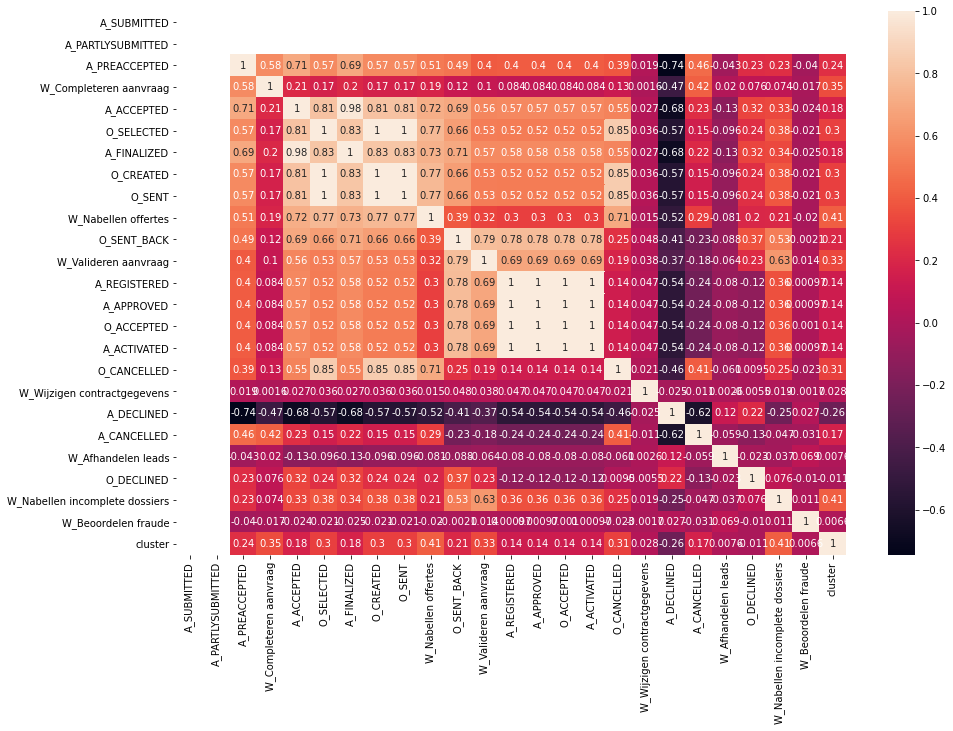

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_bow.corr(), annot=True)

In [126]:
import numpy as np

# Create correlation matrix
corr_matrix = df_bow.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]




# Drop features 
df_bow_reduced = df_bow.drop([*to_drop, 'A_SUBMITTED', 'A_PARTLYSUBMITTED'] , axis=1)

<ipython-input-126-840a633eb1b3>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot:>

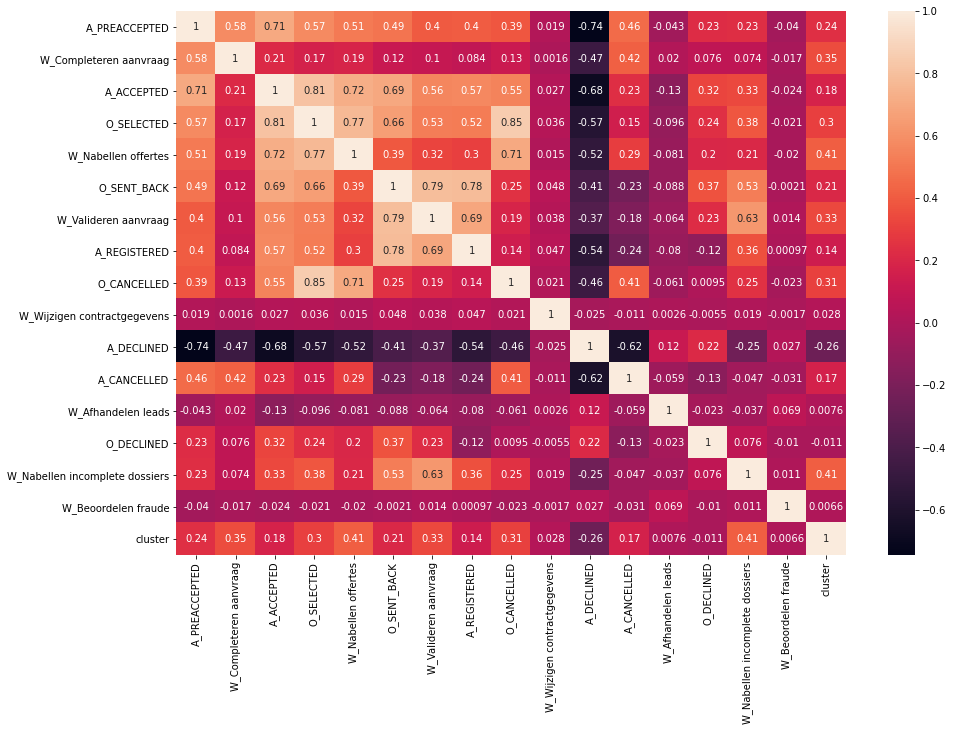

In [128]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced.corr(), annot=True)

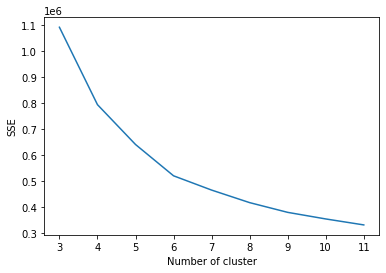

In [131]:
X = df_bow_reduced.drop(['cluster'], axis=1).values

sse = {}
for k in range(3, 12):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [130]:
df_bow_reduced

,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,A_REGISTERED,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,cluster
0,1.0,3.0,1.0,1.0,7.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,5.0,1.0,2.0,10.0,1.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,9.0,1.0,3.0,25.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,1.0,5.0,1.0,2.0,10.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
13084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1
13085,1.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1


In [132]:
kmeans = KMeans(n_clusters=6).fit(X)

In [134]:
df_bow_reduced['cluster'] = kmeans.labels_

In [135]:
dfs_reduced = {}
for k in range(6):
    dfs_reduced[k] = df_bow_reduced[df_bow_reduced.cluster == k]

In [136]:
df_clusters_reduced = pd.DataFrame([df.mean() for df in dfs.values()])

In [137]:
df_clusters_reduced

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,A_ACTIVATED,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,cluster
0,1.0,1.0,1.000000,4.972730,1.000000,1.220918,1.000000,1.220918,1.220918,7.505696,...,0.464273,0.503970,0.001381,0.187090,0.283051,0.875388,0.187090,1.127718,0.016569,0.0
1,1.0,1.0,0.233038,1.233038,0.028694,0.018370,0.018370,0.018370,0.018370,0.054572,...,0.000268,0.015017,0.000000,0.897426,0.099088,1.439662,0.001475,0.000000,0.065701,1.0
2,1.0,1.0,1.000000,6.981818,1.000000,1.890909,1.000000,1.890909,1.890909,10.218182,...,0.572727,1.118182,0.000000,0.118182,0.227273,1.045455,0.118182,57.509091,0.154545,2.0
3,1.0,1.0,1.000000,22.397550,0.187082,0.193764,0.163697,0.193764,0.193764,1.397550,...,0.042316,0.083519,0.000000,0.207127,0.654788,1.518931,0.038976,0.260579,0.031180,3.0
4,1.0,1.0,1.000000,6.587031,1.000000,1.813424,1.000000,1.813424,1.813424,22.913538,...,0.188851,1.452787,0.001138,0.098976,0.639363,1.063709,0.098976,0.832765,0.018203,4.0
5,1.0,1.0,1.000000,5.416568,1.000000,1.633136,1.000000,1.633136,1.633136,8.692308,...,0.747929,0.719527,0.008284,0.134911,0.086391,1.040237,0.134911,17.314793,0.076923,5.0


<AxesSubplot:>

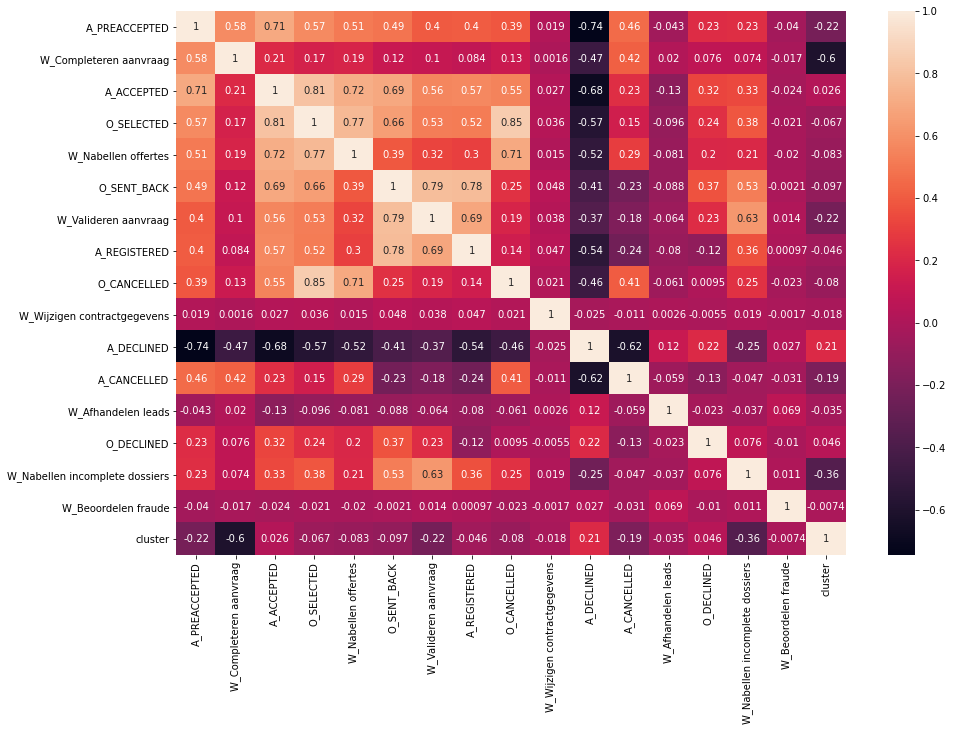

In [138]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced.corr(), annot=True)

In [151]:
df_bow_reduced_dummies = pd.get_dummies(df_bow_reduced, columns=['cluster'])

In [152]:
df_bow_reduced_dummies

,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,A_REGISTERED,O_CANCELLED,W_Wijzigen contractgegevens,...,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,1.0,3.0,1.0,1.0,7.0,1.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
1,1.0,5.0,1.0,2.0,10.0,1.0,7.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2,1.0,9.0,1.0,3.0,25.0,1.0,3.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,1.0,5.0,1.0,2.0,10.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
13083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
13084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0,0,0,0,1,0
13085,1.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0,0,0,0,1,0


<AxesSubplot:>

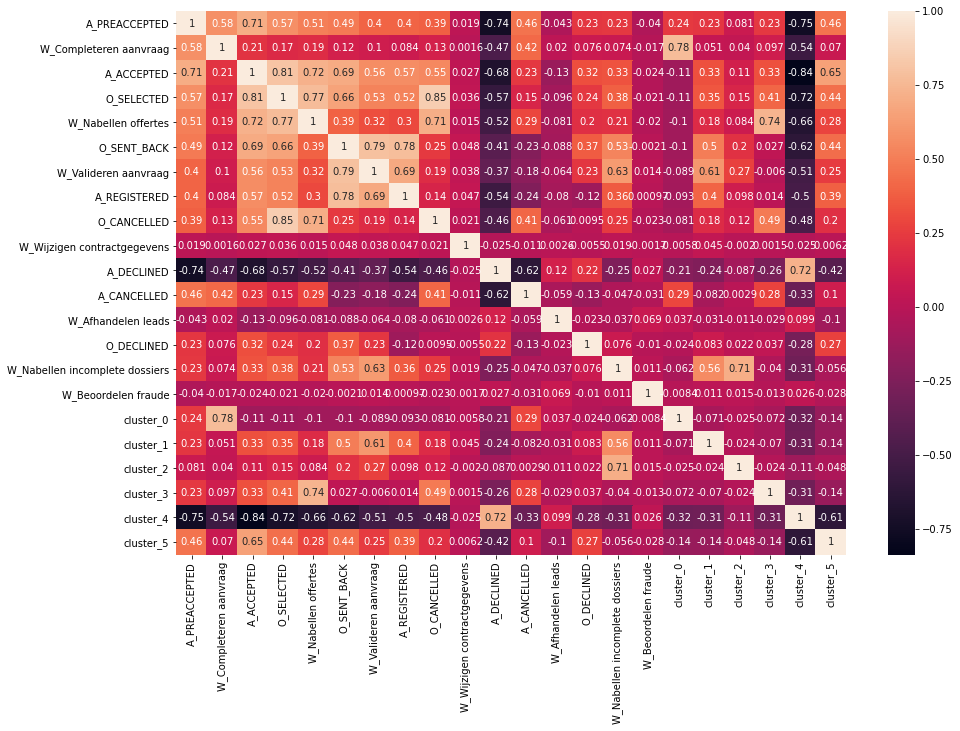

In [153]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced_dummies.corr(), annot=True)